<a href="https://colab.research.google.com/github/Harshitha-J-S/MLmodel-to-detect-phishing-Emails/blob/main/Phishing_email_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [16]:
# %mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download -d subhajournal/phishingemails

The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.


Dataset URL: https://www.kaggle.com/datasets/subhajournal/phishingemails
License(s): GNU Lesser General Public License 3.0




  0%|          | 0.00/18.0M [00:00<?, ?B/s]
  6%|▌         | 1.00M/18.0M [00:01<00:18, 973kB/s]
 11%|█         | 2.00M/18.0M [00:01<00:14, 1.13MB/s]
 17%|█▋        | 3.00M/18.0M [00:02<00:11, 1.41MB/s]
 22%|██▏       | 4.00M/18.0M [00:02<00:09, 1.63MB/s]
 28%|██▊       | 5.00M/18.0M [00:03<00:09, 1.38MB/s]
 33%|███▎      | 6.00M/18.0M [00:04<00:09, 1.30MB/s]
 39%|███▉      | 7.00M/18.0M [00:05<00:07, 1.53MB/s]
 44%|████▍     | 8.00M/18.0M [00:05<00:06, 1.72MB/s]
 50%|████▉     | 9.00M/18.0M [00:06<00:05, 1.67MB/s]
 55%|█████▌    | 10.0M/18.0M [00:06<00:04, 1.88MB/s]
 61%|██████    | 11.0M/18.0M [00:07<00:04, 1.75MB/s]
 67%|██████▋   | 12.0M/18.0M [00:08<00:04, 1.47MB/s]
 72%|███████▏  | 13.0M/18.0M [00:09<00:03, 1.54MB/s]
 78%|███████▊  | 14.0M/18.0M [00:09<00:02, 1.62MB/s]
 83%|████████▎ | 15.0M/18.0M [00:10<00:01, 1.61MB/s]
 89%|████████▊ | 16.0M/18.0M [00:10<00:01, 1.79MB/s]
 94%|█████████▍| 17.0M/18.0M [00:11<00:00, 1.54MB/s]
100%|█████████▉| 18.0M/18.0M [00:12<00:00, 1.57MB/s]
10

In [ ]:
# !unzip /content/phishingemails.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding,GRU,LSTM,Bidirectional,SimpleRNN
from tensorflow.keras.utils import pad_sequences
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense,Dropout
import tensorflow as tf
import warnings

warnings.filterwarnings('ignore')

In [22]:
df = pd.read_csv("Phishing_Email.csv")

df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [23]:
df.isnull().sum()

Unnamed: 0     0
Email Text    16
Email Type     0
dtype: int64

In [24]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)
df.dropna(inplace=True,axis=0)
df.drop_duplicates(inplace=True)

In [25]:
print("Dimension of the row data:",df.shape)

Dimension of the row data: (17538, 2)


In [26]:
df.head()

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [27]:

fig = px.bar(df['Email Type'].value_counts(), x=df['Email Type'].value_counts().index, y=df['Email Type'].value_counts().values,
             color=['blue', 'red'], labels={'x': 'Category', 'y': 'Count'},
             title="Categorical Distribution")

fig.show()

In [28]:
le = LabelEncoder()

df["Email Type"] = le.fit_transform(df["Email Type"])

In [29]:
df

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",1
1,the other side of * galicismos * * galicismo *...,1
2,re : equistar deal tickets are you still avail...,1
3,\nHello I am your hot lil horny toy.\n I am...,0
4,software at incredibly low prices ( 86 % lower...,0
...,...,...
18644,\nRick Moen a Ã©crit:> > I'm confused. I thou...,1
18645,date a lonely housewife always wanted to date ...,0
18646,request submitted : access request for anita ....,1
18647,"re : important - prc mtg hi dorn & john , as y...",1


In [30]:
import re

def preprocess_text(text):

    text = re.sub(r'http\S+', '', text)


    text = re.sub(r'[^\w\s]', '', text)

    text = text.lower()

    text = re.sub(r'\s+', ' ', text).strip()
    return text


df["Email Text"] =df["Email Text"].apply(preprocess_text)

In [31]:
df.head()

,Email Text,Email Type
0,re 6 1100 disc uniformitarianism re 1086 sex l...,1
1,the other side of galicismos galicismo is a sp...,1
2,re equistar deal tickets are you still availab...,1
3,hello i am your hot lil horny toy i am the one...,0
4,software at incredibly low prices 86 lower dra...,0


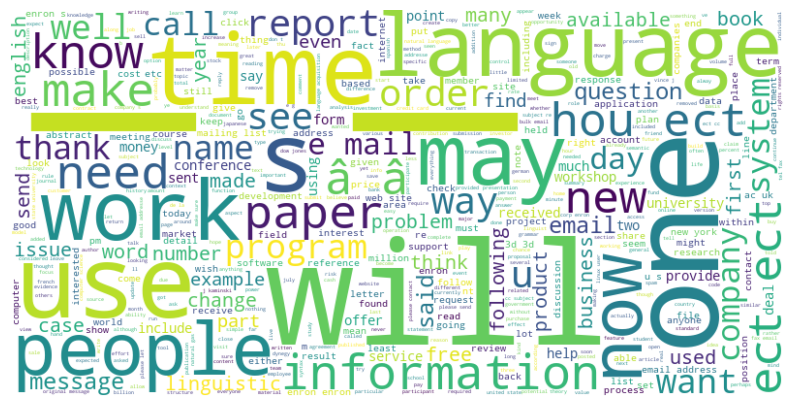

In [33]:
from wordcloud import WordCloud

all_mails = " ".join(df['Email Text'])

word_cloud = WordCloud(width=800,height=400,background_color='white',max_words=10000).generate(all_mails)
plt.figure(figsize=(10,6))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [34]:
tf = TfidfVectorizer(stop_words="english",max_features=10000)

feature_x = tf.fit_transform(df["Email Text"]).toarray()

In [35]:
y_tf = np.array(df['Email Type'])

In [36]:
x_train,x_test,y_train,y_test = train_test_split(feature_x,y_tf,train_size=0.8,random_state=0)

Accuracy from SGD Classifier: 98.26 %
F1 Score from SGD Classifier: 98.59 %
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1351
           1       0.98      0.99      0.99      2157

    accuracy                           0.98      3508
   macro avg       0.98      0.98      0.98      3508
weighted avg       0.98      0.98      0.98      3508



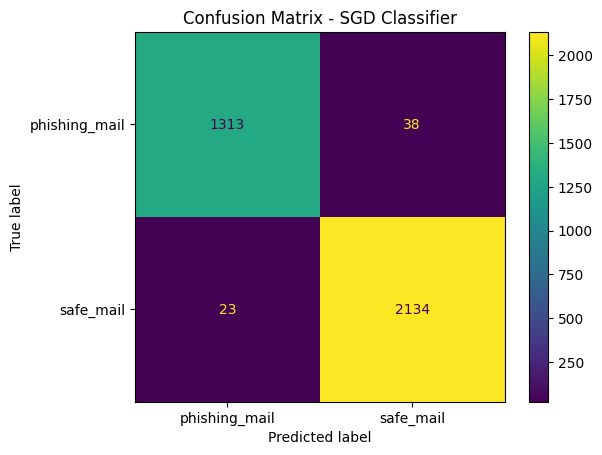

In [37]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

sgd = SGDClassifier()
sgd.fit(x_train, y_train)

pred_sgd = sgd.predict(x_test)


print(f"Accuracy from SGD Classifier: {accuracy_score(y_test, pred_sgd) * 100:.2f} %")
print(f"F1 Score from SGD Classifier: {f1_score(y_test, pred_sgd) * 100:.2f} %")
print("Classification Report:\n", classification_report(y_test, pred_sgd))

clf_sgd = confusion_matrix(y_test, pred_sgd)
ConfusionMatrixDisplay(confusion_matrix=clf_sgd, display_labels=['phishing_mail', 'safe_mail']).plot()
plt.title("Confusion Matrix - SGD Classifier")
plt.show()


Accuracy from MLP Classifier: 98.46 %
F1 Score from MLP Classifier: 98.75 %
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1351
           1       0.99      0.99      0.99      2157

    accuracy                           0.98      3508
   macro avg       0.98      0.98      0.98      3508
weighted avg       0.98      0.98      0.98      3508



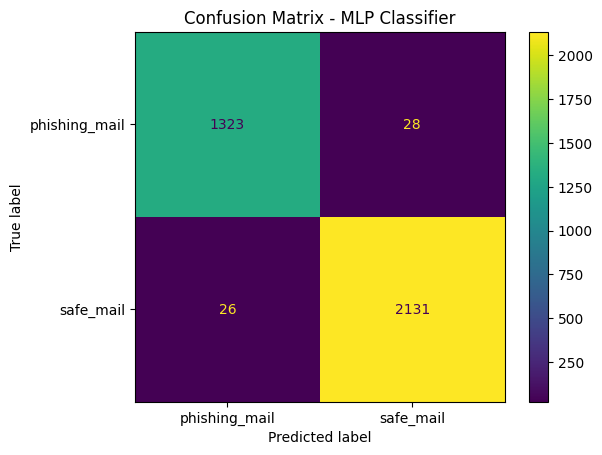

In [38]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


mlp = MLPClassifier()
mlp.fit(x_train, y_train)

pred_mlp = mlp.predict(x_test)


print(f"Accuracy from MLP Classifier: {accuracy_score(y_test, pred_mlp) * 100:.2f} %")
print(f"F1 Score from MLP Classifier: {f1_score(y_test, pred_mlp) * 100:.2f} %")
print("Classification Report:\n", classification_report(y_test, pred_mlp))

clf_mlp = confusion_matrix(y_test, pred_mlp)
ConfusionMatrixDisplay(confusion_matrix=clf_mlp, display_labels=['phishing_mail', 'safe_mail']).plot()
plt.title("Confusion Matrix - MLP Classifier")
plt.show()


In [39]:
import plotly.express as px

models = ['SGD Classifier', 'MLP Classifier']
accuracies = [98.57, 98.29]

fig = px.bar(x=models, y=accuracies, labels={'x': 'Models', 'y': 'Accuracy'},
             title="Performance Comparison: SGD vs MLP", text=accuracies)

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside', marker_color=['blue', 'orange'])

fig.show()


In [40]:
max_len = 150

tk = Tokenizer()


tk.fit_on_texts(df['Email Text'])
sequences = tk.texts_to_sequences(df['Email Text'])
vector = pad_sequences(sequences,padding='post', maxlen=max_len)

In [41]:
len(vector)

17538

In [42]:
x = np.array(vector)
y = np.array(df["Email Type"])

In [43]:
x_train, x_test, y_train, y_test = train_test_split(vector,df['Email Type'], test_size=0.2, random_state =0)

In [44]:
model = Sequential()
model.add(Embedding(input_dim=len(tk.word_index)+1,output_dim=50,input_length=150))
model.add(LSTM(units=100))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [45]:
model.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [47]:
historical  = model.fit(x_train,y_train, epochs=5, batch_size=16, validation_data=(x_test,y_test))

Epoch 1/5
877/877 ━━━━━━━━━━━━━━━━━━━━ 115s 119ms/step - accuracy: 0.7277 - loss: 0.5431 - val_accuracy: 0.8264 - val_loss: 0.4026
Epoch 2/5
877/877 ━━━━━━━━━━━━━━━━━━━━ 150s 128ms/step - accuracy: 0.9221 - loss: 0.2435 - val_accuracy: 0.9521 - val_loss: 0.1679
Epoch 3/5
877/877 ━━━━━━━━━━━━━━━━━━━━ 140s 126ms/step - accuracy: 0.9331 - loss: 0.2067 - val_accuracy: 0.7075 - val_loss: 0.5083
Epoch 4/5
877/877 ━━━━━━━━━━━━━━━━━━━━ 131s 114ms/step - accuracy: 0.7968 - loss: 0.3897 - val_accuracy: 0.9595 - val_loss: 0.1460
Epoch 5/5
877/877 ━━━━━━━━━━━━━━━━━━━━ 102s 116ms/step - accuracy: 0.9765 - loss: 0.0862 - val_accuracy: 0.9578 - val_loss: 0.1346


Text(0, 0.5, 'Loss')

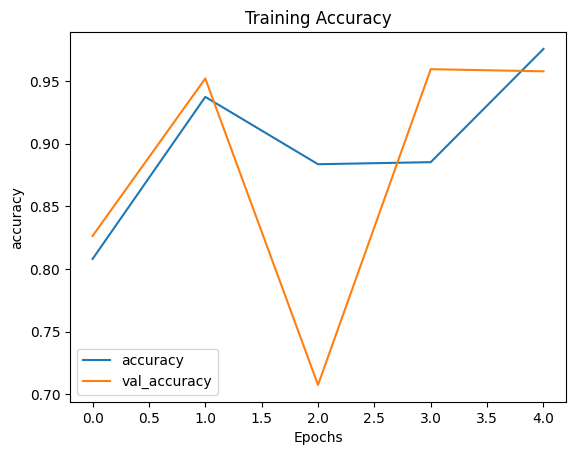

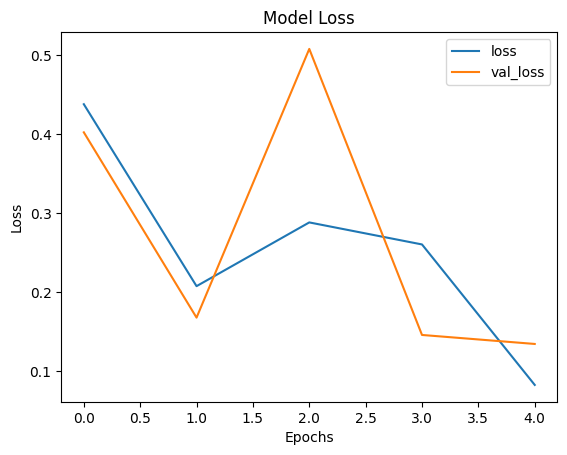

In [48]:
import matplotlib.pyplot as plt
pd.DataFrame(historical.history)

pd.DataFrame(historical.history)[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')

pd.DataFrame(historical.history)[['loss', 'val_loss']].plot()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [49]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib

# Load the dataset
df = pd.read_csv('Phishing_Email.csv')  # Replace with your dataset file

# Preprocess the data
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Convert Email Text to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X = vectorizer.fit_transform(df['Email Text'])
y = df['Email Type'].apply(lambda x: 1 if x == 'Phishing Email' else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# Save the model and vectorizer
joblib.dump(model, 'phishing_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

Accuracy: 0.9688757713979071


['vectorizer.pkl']